<a href="https://colab.research.google.com/github/mayafetzer/cheg472/blob/main/Machine_Learning_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maya Fetzer

CHEG472

Machine Learning In-class workshop

### Machine Learning

Machine learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit programming. The fundamental idea behind machine learning is to allow systems to learn from data and improve their performance over time.

In traditional programming, developers write explicit instructions for a computer to perform a task. However, in machine learning, the system learns patterns and features from data, allowing it to make predictions, classifications, or decisions without being explicitly programmed for the specific task. The learning process involves the algorithm adjusting its parameters based on the input data, iteratively refining its ability to make accurate predictions or decisions.

There are several types of machine learning, including:

Supervised Learning: In this approach, the algorithm is trained on a labeled dataset, where each input has a corresponding output. The goal is for the algorithm to learn the mapping between inputs and outputs, enabling it to make predictions on new, unseen data.

Unsupervised Learning: Unlike supervised learning, unsupervised learning involves training the algorithm on unlabeled data. The system tries to identify patterns, relationships, or structures within the data without explicit guidance.

Reinforcement Learning: In reinforcement learning, an agent learns by interacting with an environment. The agent receives feedback in the form of rewards or penalties based on the actions it takes. The goal is for the agent to learn a strategy that maximizes cumulative rewards over time.

Semi-Supervised Learning: This approach combines elements of both supervised and unsupervised learning. The algorithm is trained on a dataset that contains both labeled and unlabeled examples.

Deep Learning: Deep learning is a subset of machine learning that focuses on neural networks with many layers (deep neural networks). Deep learning algorithms, often referred to as artificial neural networks, are particularly effective in tasks such as image and speech recognition.

Machine learning requires a lot of different libraries, most of which are from sklearn. These libraries are important for preprocessing and machine learning, and provide useful functions to make machine learning possible.

In [ ]:
!pip install shap -q


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.5 MB/s eta 0:00:00


The first step to machine learning is to upload the dataset that you want to use.

In [ ]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/SAF_Dataset.xlsx'

The next step is to handle and clean the dataset. You do this by removing missing vales, checking and removing duplicates, and handling outliers. It is also important during this step to understand the dataset and look at the statistical patterns and correlations of the data.

In [ ]:
# load the data
df=pd.read_excel(file_path)
# check if the data contains null values
df.isna().sum()

,0
C (%),0
H (%),0
N (%),0
O (%),0
S (%),0
VM (%),0
Ash (%),0
FC (%),0
Cel (%),0
Hem (%),0


In [ ]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
    print("There are duplicates in the dataset.")
else:
    print("No duplicates found in the dataset.")

There are duplicates in the dataset.


In [ ]:
duplicate_rows

,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Location,Plant capacity (kg/hr),MSP
10,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,US,25000,0.7500
41,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,UK,25000,0.8112
72,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,China,25000,0.4752
103,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,US,50000,1.0800
134,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,UK,50000,1.1232
165,47.64903,6.174469,0.619478,45.557022,0.0,72.95,1.54,25.51,29.01,41.24,22.4,China,50000,0.6996


For machine learning, we will drop duplicte values. Dropping duplicated rows from a dataset is essential for several reasons:

1) Data Quality and Accuracy: Duplicated rows can skew statistical analysis by inflating the importance of particular observations. Removing duplicates ensures the accuracy and integrity of the dataset.

2) Model Performance: Duplicated data can mislead machine learning models. Models might assign more importance to observations that are duplicated, affecting the model's training and potentially reducing its generalization performance.

3) Reduced Bias: In cases where certain data points are unintentionally duplicated, removing them helps in reducing bias and ensuring that all data points are considered equally during analysis or modeling.

4) Improved Efficiency: Datasets with duplicated rows may cause unnecessary computations or additional processing time. Removing duplicates streamlines data processing and analysis, making it more efficient.

5) Data Consistency: Eliminating duplicates promotes a consistent and clean dataset, making it easier to work with, especially when merging or combining datasets.

N/B: However, it's important to consider the context and nature of the dataset before removing duplicates. In some cases, duplicated rows might be valid and intentional. When dropping duplicates, it's essential to identify and drop them based on specific columns or criteria relevant to the dataset's context. This ensures that the right data is preserved, and only redundant or erroneous information is removed.

In [ ]:
# drop duplicates
data = df.drop_duplicates()

In [ ]:
data.describe()  # Summary statistics for numerical columns

,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Plant capacity (kg/hr),MSP
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,49.568108,6.426992,1.832344,41.943725,0.228832,75.549290,8.932959,15.517909,33.841149,26.517362,21.821477,37500.000000,0.791798
std,4.054455,1.053328,1.969576,5.102580,0.396534,9.312775,9.954111,6.233776,10.083854,9.537139,11.166899,12534.867571,0.242549
min,40.020000,5.320000,0.100000,27.360000,0.000000,49.357766,0.400000,3.366013,6.920000,12.800000,1.600000,25000.000000,0.396000
25%,47.014626,5.980000,0.490884,39.366227,0.000000,71.700000,1.783784,11.834197,25.185185,22.000000,14.500000,25000.000000,0.640150
50%,48.889915,6.180527,1.183134,43.107174,0.000000,76.937237,4.504225,16.320098,35.945000,24.650000,23.584950,37500.000000,0.730000
75%,52.846674,6.500000,2.189781,45.557022,0.310034,81.797235,14.800000,20.093857,42.600000,28.000000,26.800000,50000.000000,0.998400
max,60.460000,10.762332,8.210000,52.860000,1.552259,94.161220,42.020000,26.600000,49.873571,55.419525,53.400000,50000.000000,1.591200


In [ ]:
data.dtypes

,0
C (%),float64
H (%),float64
N (%),float64
O (%),float64
S (%),float64
VM (%),float64
Ash (%),float64
FC (%),float64
Cel (%),float64
Hem (%),float64


The result of the data.dtypes shows we have a mixed data containing both numerical(float64 and int64) and categorical data (Location)

In [ ]:
# Look at the different values of the categorical variable of the dataset, "Location"
data['Location '].unique()

array(['US', 'UK', 'China'], dtype=object)

In [ ]:
data['Location '].value_counts() # number of occurence of each unique value

,count
Location,
US,60
UK,60
China,60


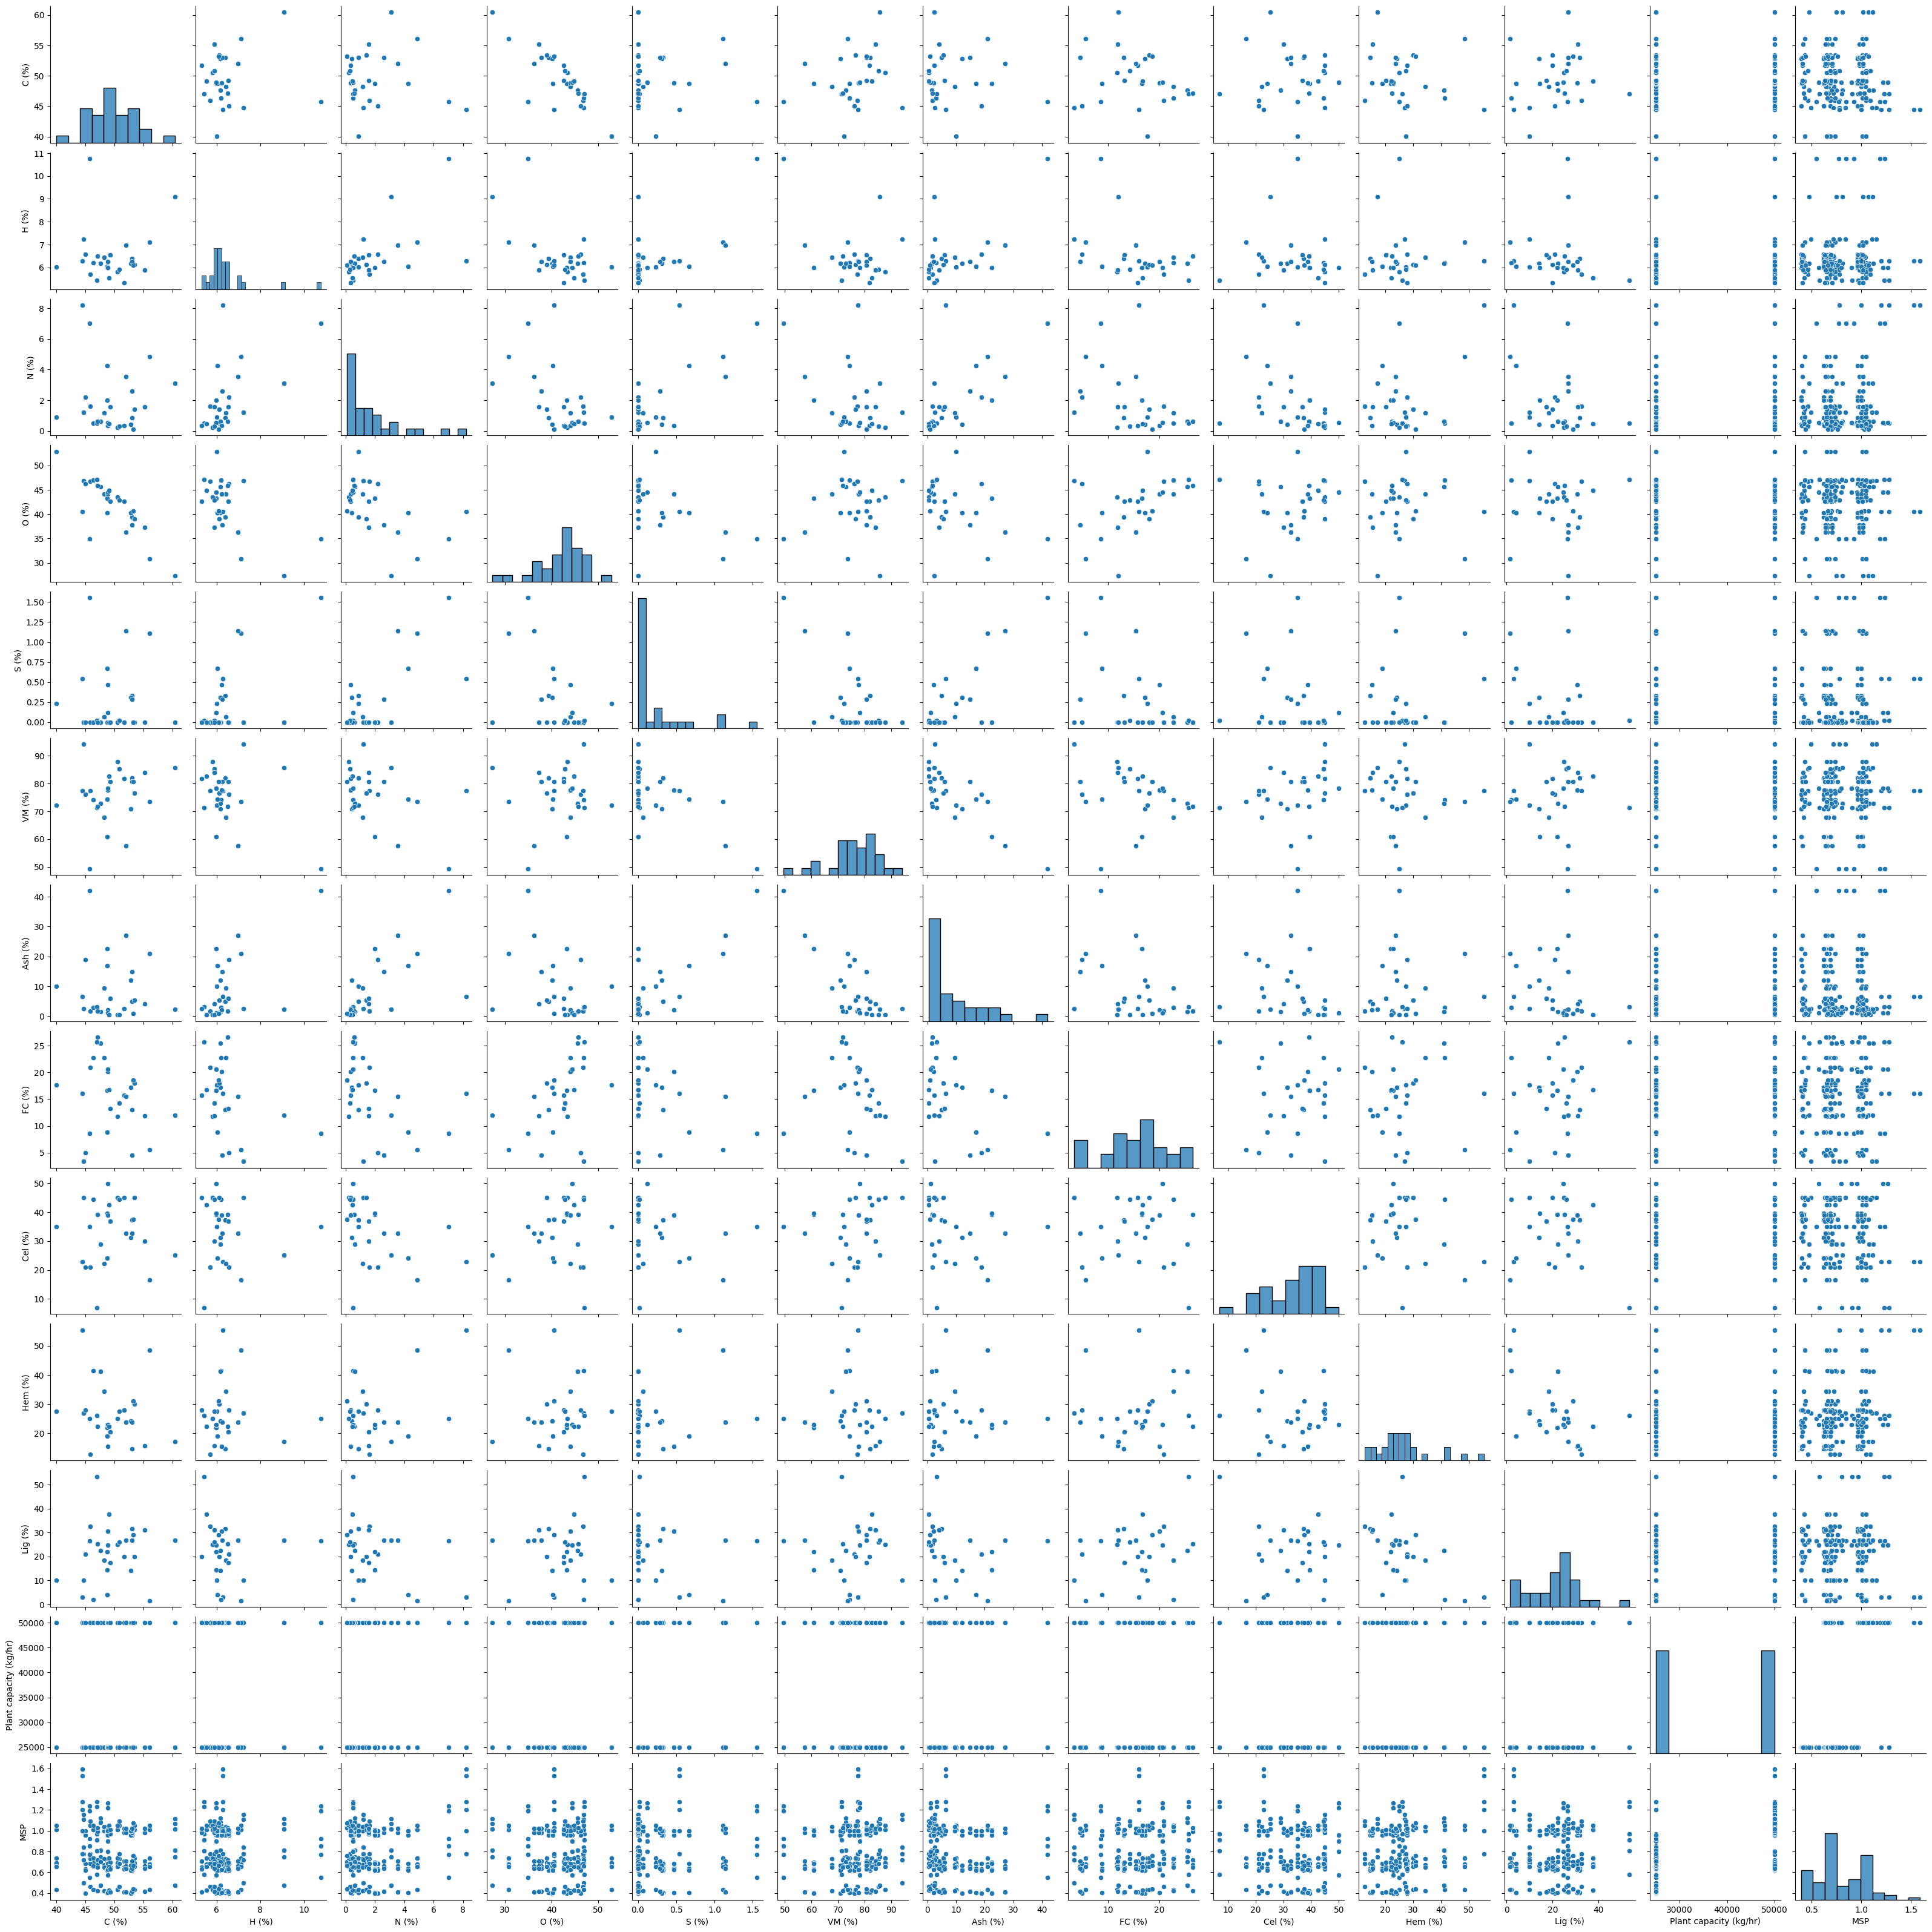

In [ ]:
sns.pairplot(data)

Data can have asymmetry in the form of a left or right skew. It is important to handle left and right skews so that the data can be fit.

Strategies for Right-Skewed Data (Positive Skewness):
Log Transformation
Square Root Transformation
Box-Cox Transformation
Outlier Detection and Treatment etc

Strategies for Left-Skewed Data (Negative Skewness):
Log Transformation (to inverse transform)
Square Root Transformation
Box-Cox Transformation
Outlier Detection and Treatment

To fit the data with a linear model regression, it is a good practice to employ variables presenting a high correlation with the target. One way to do this is by calculating correlation coefficients and another way is through visual methods.

We will predict the MSP value for biomass, so we import the data and then inspect the dataset.

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns
correlations = numerical_columns.corr()['MSP']  # Computing the correlation matrix
print(correlations)

C (%)                    -0.111409
H (%)                     0.096142
N (%)                     0.228733
O (%)                    -0.025138
S (%)                     0.071103
VM (%)                    0.008606
Ash (%)                  -0.039095
FC (%)                    0.049585
Cel (%)                  -0.102357
Hem (%)                   0.207144
Lig (%)                  -0.007428
Plant capacity (kg/hr)    0.599962
MSP                       1.000000
Name: MSP, dtype: float64


Linear Regression

In this section, we will perform a linear regression using alcohol as the predictor variable ( xi ) and density as the target ( yi ), according to the model:

yi=β1xi+β0

We will split the data into training and test sets, which is commonly done in machine learning methods for validation of the model created. For more information, please visit the documentation.

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Plant capacity (kg/hr)']]
y = data['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Data Cleansing
# Data cleansing, also known as data cleaning or data scrubbing, is the process of identifying
# and correcting errors, inconsistencies, inaccuracies, and incomplete data in a dataset.
# The goal of data cleansing is to improve the quality of the data, making it more accurate,
# reliable, and suitable for analysis. Clean data is essential for making informed decisions,
# conducting meaningful analyses, and building reliable machine learning models.
# Here are common steps involved in data cleansing:
# from sklearn.model_selection import train_test_split

X = data[['Plant capacity (kg/hr)']]
y = data['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We first import the library to perform the linear regression and define which is the predictor variable and the target. For more information, please visit the documentation.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Then we can print the parameters of the linear regression. This gives us more insight to the regression model that was built.

In [ ]:
print('β1 = ' + str(linear_regression.coef_) + ', β0 = ' + str(linear_regression.intercept_))

β1 = [1.10886436e-05], β0 = 0.37347929382093337


We can quantify how good teh regression was by using an R^2 value. The adjustments are usually better on the training sets than the test sets, but in this case, we will find that the training set has some outliers that make this adjustment for the training set worse.

In [ ]:
from sklearn.metrics import r2_score
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

print('R2 train = ', r2_score(y_train, y_pred_train))
print('R2 test = ', r2_score(y_test, y_pred_test))


R2 train =  0.33034146958569244
R2 test =  0.42116439304980413


One way to visualize how good the adjustment was is to plot the predicted value against the actual value.

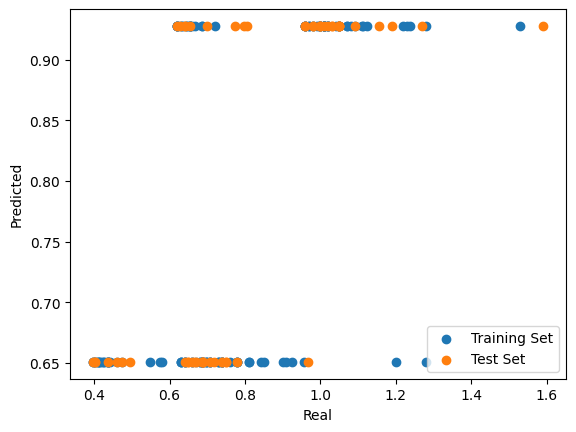

In [ ]:
plt.scatter(y_train,y_pred_train, label='Training Set')
plt.scatter(y_test,y_pred_test, label='Test Set')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Multiple Linear Regression

Multiple linear regression (MLR) is a generalization of classical linear regression. MLR models a linear relationship between the target response and multiple explanatory variables.

yi=β0​+β1xi1​+β2xi2​+...+βp​xip​

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Location ', 'MSP'], axis=1)
y = df['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Since MLR is a generalization, the Scikit Learn library uses the same function that we used before.

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Increasing the number of predictor variables leads to a better adjustment of the target so that the value of  R2  increases.

In [ ]:
from sklearn.metrics import r2_score

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

print('R2 training = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

R2 training =  0.48827435989087087
R2 test =  0.5125579138975582


Another useful metric is  RSME . It has the advantage that it can be used for non-linear models. For more information, please visit the documentation.

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print('RSME test= ', rmse_test)

RSME test=  0.17493834232080777


Again, we can use a graph to compare the training and test set.

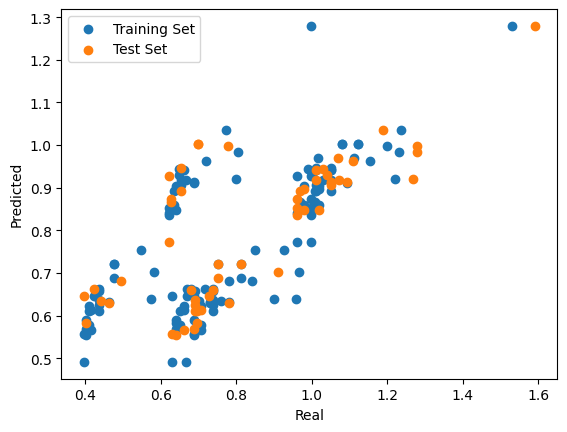

In [ ]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Let's analyze the coefficients of the MLR and pay attention to their magnitude. It seems difficult to conclude anything about their importance.

In [ ]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                        Coefficients
C (%)                      -0.015608
H (%)                       0.028369
N (%)                       0.032910
O (%)                      -0.007427
S (%)                      -0.038244
VM (%)                    -27.440813
Ash (%)                   -27.444588
FC (%)                    -27.440011
Cel (%)                     0.001636
Hem (%)                     0.005448
Lig (%)                     0.004271
Plant capacity (kg/hr)      0.000011


<Axes: >

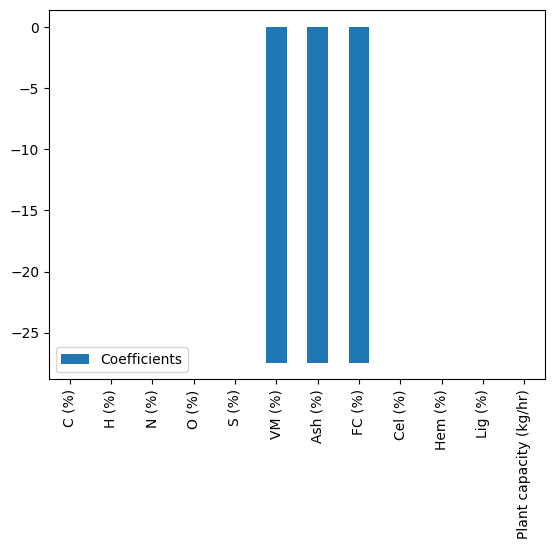

In [ ]:
coefficients.plot.bar()

#Standardization
---
The standardization is a method to transform the different predictor variables into comparable ranges. Using standardized data, a higher coefficient indicates that it is a predictor variable that has more importance to predict the target.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Location ', 'MSP'], axis=1)
y = df['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardizing after splitting the dataset is a way to avoid bias.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multiple_linear_regression.predict(X_test)

rmse_MLR = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print('R2 test = ', r2)
print('RSME test = ', rmse_MLR)

R2 test =  0.5127847004237656
RSME test =  0.1748976418193674


As the data is standardized, we can analyze the coefficients and determine which are the most important predictor variables.

In [ ]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                        Coefficients
C (%)                  -3.496799e+11
H (%)                  -9.703040e+10
N (%)                  -1.710828e+11
O (%)                  -4.543209e+11
S (%)                  -3.752171e+10
VM (%)                 -2.621647e+02
Ash (%)                -2.871064e+02
FC (%)                 -1.749344e+02
Cel (%)                 1.634407e-02
Hem (%)                 5.051422e-02
Lig (%)                 4.627991e-02
Plant capacity (kg/hr)  1.410770e-01


We can see that some variables are less important to generate the regression model. It is worth noticing that using only the plant capacity,C,,O and S might make a better model since the other variables do not affect notably the prediction and introduce noise into the model.

<Axes: >

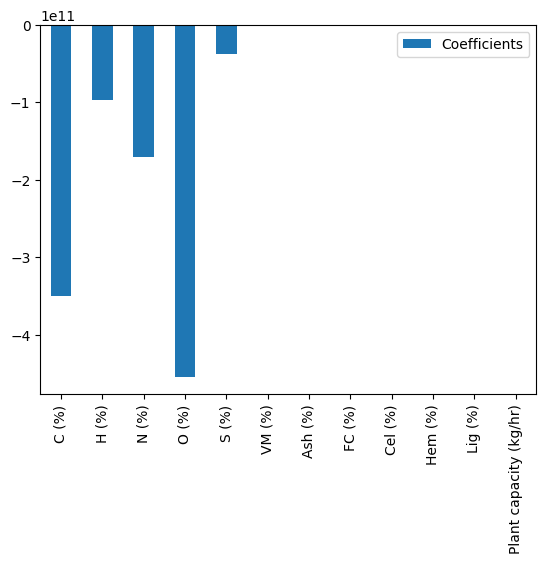

In [ ]:
coefficients.plot.bar()

#LASSO
---
Least Absolute Shrinkage and Selection Operator (LASSO) is a linear regression method that produces variable selection and regularization to improve the prediction accuracy and generate a smaller model. This method uses a cost function with a constant alpha that defines the degree of penalization.

$
LASSO_{CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p |w_j| \\
For \; some \; t \, > \, 0, \, \sum_{j=0}^p |w_j|<t
$

**Scikit learn** has implemented LASSO in the function **sklearn.linear_model.Lasso**. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html 'sklearn.linear_model.Lasso').


In [ ]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.0001)
lasso_regression.fit(X = X_train, y = y_train)

Lasso(alpha=0.0001)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_regression.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R2 test = ', r2)

R2 test =  0.5203331141529778


Let's analyze if using LASSO we have a smaller model where some of the coefficients are zero.

In [ ]:
coeffecients = pd.DataFrame(lasso_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient']
print(coeffecients)

                        Coeffecient
C (%)                     -0.025621
H (%)                      0.023622
N (%)                      0.074934
O (%)                      0.000000
S (%)                     -0.015569
VM (%)                     0.000000
Ash (%)                   -0.044924
FC (%)                     0.004416
Cel (%)                    0.009766
Hem (%)                    0.047468
Lig (%)                    0.037849
Plant capacity (kg/hr)     0.141417


<Axes: >

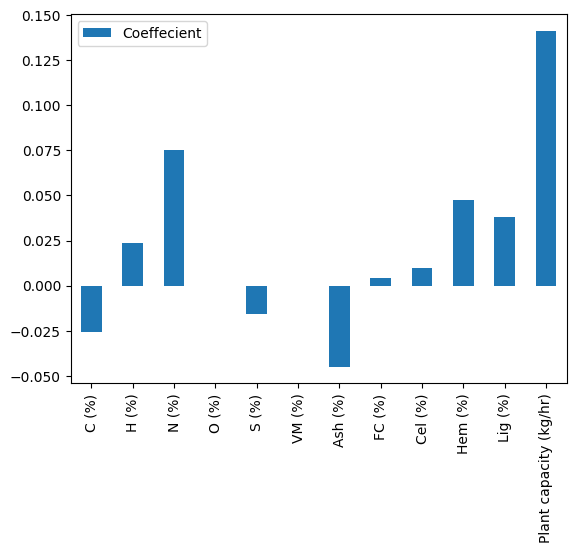

In [ ]:
coeffecients.plot.bar()

The coefficients plot bar for lasso model shows that the plant capacity,C,H,N,S,Ash,Hem and Lig are very important features

## Comparing various ML models
Comparing various models is a crucial step in the process of building machine learning systems.
Comparing various models is essential for making informed decisions about the selection and deployment of machine learning models. It helps in understanding their strengths and weaknesses, guiding further optimization efforts, and ensuring that the chosen model aligns with the goals and constraints of the specific task at hand.

 Various machine learning models were compared using just the numerical columns

In [ ]:
X = data.drop('MSP',axis=1)
Y = data['MSP']
# Select only numerical columns (excluding 'object' type)
X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')

SGD Mean Squared Error: 1638262093428598821857076457162932224.000, R² Score: -30499138921560587927113147632259694592.000, MAE: 1214278241610202624.000
 
Random Forest Mean Squared Error: 0.045, R² Score: 0.163, MAE: 0.188
 
Gradient Boosting Mean Squared Error: 0.050, R² Score: 0.066, MAE: 0.197
 
AdaBoost Mean Squared Error: 0.035, R² Score: 0.350, MAE: 0.171
 
Decision Tree Mean Squared Error: 0.060, R² Score: -0.108, MAE: 0.215
 
MLP Mean Squared Error: 1607826.238, R² Score: -29932520.784, MAE: 1205.645
 
SVR Mean Squared Error: 0.023, R² Score: 0.566, MAE: 0.129
 
XGBoost Mean Squared Error: 0.059, R² Score: -0.099, MAE: 0.212
 
Linear Regression Mean Squared Error: 0.029, R² Score: 0.468, MAE: 0.145
 
Extra Trees Mean Squared Error: 0.059, R² Score: -0.107, MAE: 0.214
 


The effects of scaling the data were also investigated.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train with scaled data
    y_pred = model.predict(X_test_scaled)  # Predict with scaled test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')

SGD Mean Squared Error: 0.031, R² Score: 0.429, MAE: 0.155
 
Random Forest Mean Squared Error: 0.046, R² Score: 0.142, MAE: 0.192
 
Gradient Boosting Mean Squared Error: 0.050, R² Score: 0.066, MAE: 0.197
 
AdaBoost Mean Squared Error: 0.029, R² Score: 0.456, MAE: 0.159
 
Decision Tree Mean Squared Error: 0.060, R² Score: -0.108, MAE: 0.215
 
MLP Mean Squared Error: 0.042, R² Score: 0.221, MAE: 0.177
 
SVR Mean Squared Error: 0.042, R² Score: 0.221, MAE: 0.182
 
XGBoost Mean Squared Error: 0.059, R² Score: -0.099, MAE: 0.212
 
Linear Regression Mean Squared Error: 0.029, R² Score: 0.467, MAE: 0.145
 
Extra Trees Mean Squared Error: 0.059, R² Score: -0.107, MAE: 0.214
 


#### Comparing the various ML models using both the numerical and categorical columns.
The categorical are transformed using onehot encoding (pd.get_dummies())

In [ ]:
# Apply one-hot encoding to specific columns
encoded_df = pd.get_dummies(data, columns=['Location '])
x = encoded_df.drop('MSP',axis=1)
y = encoded_df['MSP']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train with scaled data
    y_pred = model.predict(X_test)  # Predict with scaled test data
    r2 = r2_score(y_test, y_pred)
    if r2 > 0.90:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

Random Forest R² Score: 0.953, Mean Squared Error: 0.003, MAE: 0.037
 
Gradient Boosting R² Score: 0.976, Mean Squared Error: 0.001, MAE: 0.021
 
Decision Tree R² Score: 0.927, Mean Squared Error: 0.004, MAE: 0.041
 
XGBoost R² Score: 0.959, Mean Squared Error: 0.002, MAE: 0.032
 
Linear Regression R² Score: 0.936, Mean Squared Error: 0.003, MAE: 0.045
 
Extra Trees R² Score: 0.952, Mean Squared Error: 0.003, MAE: 0.040
 


## Cross validation
---
 Is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem. The overall aim of Cross-Validation is to use it as a tool to evaluate machine learning models, by training a number of models on different subsets of the input data.

Cross-validation can be used to detect overfitting in a model which infers that the model is not effectively generalizing patterns and similarities in the new inputted data.



#### A typical Cross-Validation workflow:


In order to perform cross-validation, the following steps are typically taken:

+ Split the dataset into training data and test data
+ The parameters will undergo a Cross-Validation test to see which are the best parameters to select.
+ These parameters will then be implemented into the model for retraining
+ Final evaluation will occur and this will depend if the cycle has to go again, depending on the accuracy and the level of generalization that the model performs.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

 # Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Cross-validation for each model
selected_models = []
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=10, scoring='r2')  # Perform 5-fold cross-validation
    mean_r2 = cv_scores.mean()
    if mean_r2 > 0.2:
        print(cv_scores,model)
        model.fit(X_train, y_train)  # Train the model on the entire training set
        y_pred = model.predict(X_test)  # Predict on the test set
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} Mean R² Score: {mean_r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

[ 0.87253088  0.79223579  0.66108664  0.58845235 -1.17216506  0.82114912
  0.81294889  0.68083457  0.76159612  0.00235782] RandomForestRegressor()
Random Forest Mean R² Score: 0.482, Mean Squared Error: 0.002, MAE: 0.036
 
[ 0.97512352  0.93088759  0.96903016  0.93887662 -0.5255297   0.97925515
  0.96559689  0.95048298  0.90797462  0.17115002] GradientBoostingRegressor()
Gradient Boosting Mean R² Score: 0.726, Mean Squared Error: 0.001, MAE: 0.021
 
[ 0.88329644  0.8826148   0.80798696  0.55052373 -1.79516076  0.92687369
  0.93631863  0.8484508   0.58470983  0.23973823] DecisionTreeRegressor()
Decision Tree Mean R² Score: 0.487, Mean Squared Error: 0.004, MAE: 0.040
 
[ 0.95675011  0.94395989  0.88626091  0.72668295 -2.04710626  0.96041027
  0.9569076   0.89058689  0.82837486  0.38528535] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
   

### Feature Selection and Transformation
---
Feature selection is a critical process in machine learning and data analysis that involves choosing a subset of relevant features (variables or columns) from the original dataset. The objective of feature selection is to select the most informative and significant features while excluding redundant, irrelevant, or noisy ones. This process improves model performance, reduces overfitting, and enhances interpretability.

#### When not to use pd.get_dummies()
+ The get_dummies function does not account for unseen data
Therefore, the dummy variables generated with the testing data must match the dummy variables generated with the training data. With this in mind, it is easy to see how using Pandas for one hot encoding can cause problems

In [ ]:
# Split the dataset into training and testing sets
X = data.drop('MSP',axis=1)
Y = data['MSP']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = ['Location ']  # Replace 'Location' with your categorical column name
encoder = OneHotEncoder()

# Feature transformation function for log, square root, and polynomial features
log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
     ('log_sqrt',log_sqrt_transformer,numerical_features),
       ('poly_trans',polynomial_transformer,numerical_features),
        ('cat', encoder, categorical_features)
    ]
)
# Initialize models
models = {
   'SGD': SGDRegressor(),
  'Random Forest': RandomForestRegressor(),
   'Gradient Boosting': GradientBoostingRegressor(),
   'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
   'Extra Trees': ExtraTreesRegressor()
}


# Train and evaluate each model
for name, model in models.items():
    # Use Pipeline to chain preprocessing and modeling steps
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)  # Train the model

    # No need to separately encode X_test, the pipeline handles it
    r2 = model_pipeline.score(X_test, y_test)  # R² Score
    if r2 > 0.95:
        y_pred = model_pipeline.predict(X_test)  # Predict
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")



Gradient Boosting R² Score: 0.982, Mean Squared Error: 0.001, MAE: 0.021
Linear Regression R² Score: 0.971, Mean Squared Error: 0.002, MAE: 0.033
Extra Trees R² Score: 0.961, Mean Squared Error: 0.002, MAE: 0.034


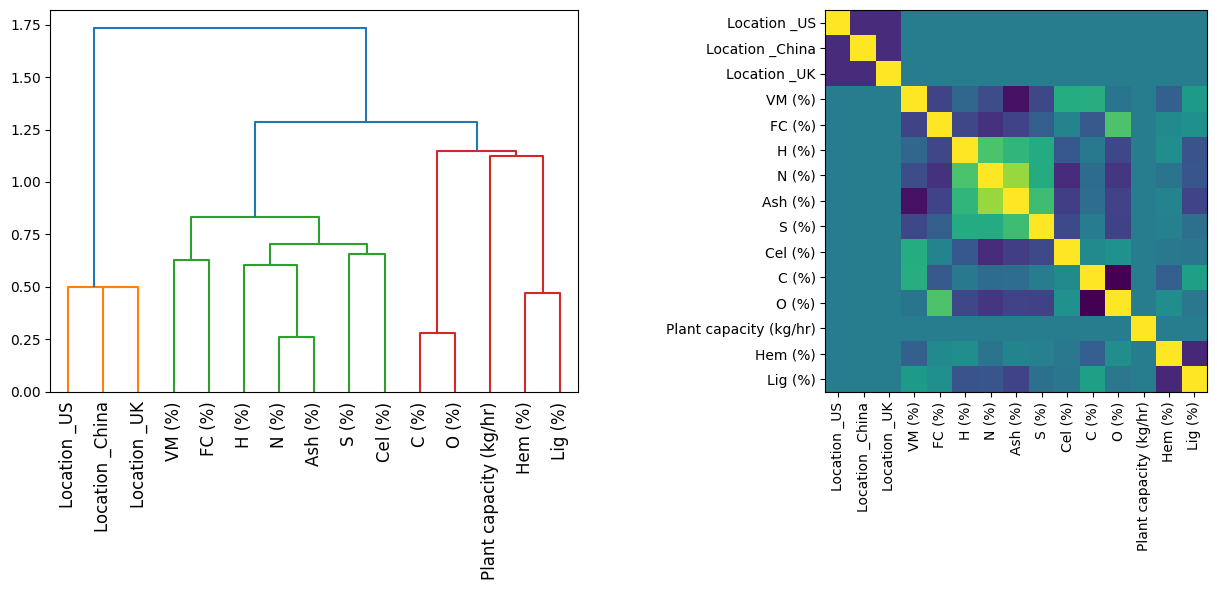

In [ ]:
def plot_correlation(data,target_column='MSP'):

  df = pd.get_dummies(data, columns=['Location '])
  x = df.drop(target_column, axis=1)
  cols = x.columns
  """
  Function that shows the correlation and clustering between the features:

  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
  corr = spearmanr(x).correlation

  # Ensure the correlation matrix is symmetric
  corr = (corr + corr.T) / 2
  np.fill_diagonal(corr, 1)
  # We convert the correlation matrix to a distance matrix before performing
  # hierarchical clustering using Ward's linkage.
  distance_matrix = 1 - np.abs(corr)
  dist_linkage = hierarchy.ward(squareform(distance_matrix))
  dendro = hierarchy.dendrogram(
      dist_linkage, labels=cols, ax=ax1, leaf_rotation=90
  )
  dendro_idx = np.arange(0, len(dendro["ivl"]))

  ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
  ax2.set_xticks(dendro_idx)
  ax2.set_yticks(dendro_idx)
  ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
  ax2.set_yticklabels(dendro["ivl"])
  fig.tight_layout()
  plt.show()

plot_correlation(data)

From the correlation plot above, we can see features that belongs to this cluster. Generally, there are three distinct clusters that has older sub clusters. At least one feature is selected from each sub clusters. After trial and error, I noticed the observed features were more important. Also, the coefficient plot bar for the lasso model can also guide you in feature selection

In [ ]:
# feature selection
cols_ = [
    'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)',
    'Plant capacity (kg/hr)', 'Location '
]

X = data.drop('MSP', axis=1)
X = X[cols_]
Y = data['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = ['Location ']  # Replace 'Location' with your categorical column name
encoder = OneHotEncoder()

# Feature transformation function for log and polynomial features
log_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),
        ('log', log_transformer, numerical_features),  # Apply log transform to numerical columns
        ('poly', polynomial_transformer, numerical_features)  # Apply polynomial features to numerical columns
    ]
)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    # Use Pipeline to chain preprocessing and modeling steps
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    model_pipeline.fit(X_train, y_train)  # Train the model

    # No need to separately encode X_test, the pipeline handles it
    r2 = model_pipeline.score(X_test, y_test)  # R² Score
    if r2 > 0.95:
        y_pred = model_pipeline.predict(X_test)  # Predict
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        selected_models.append((name, model))


# XGBoost  improved as well in addition to the previous models

Random Forest R² Score: 0.957, Mean Squared Error: 0.002, MAE: 0.034
Gradient Boosting R² Score: 0.980, Mean Squared Error: 0.001, MAE: 0.021
XGBoost R² Score: 0.978, Mean Squared Error: 0.001, MAE: 0.024
Linear Regression R² Score: 0.970, Mean Squared Error: 0.002, MAE: 0.033
Extra Trees R² Score: 0.955, Mean Squared Error: 0.002, MAE: 0.033


## Stacked model
---
Stacking models, also known as stacked generalization, is a technique used to combine multiple machine learning models to improve overall predictive performance.

+ Combine multiple models to improve overall predictive performance.
+ Useful when individual models possess different strengths and weaknesses.
+ Aims to reduce overfitting by amalgamating diverse predictions.
+ Helpful for handling heterogeneous datasets with varied feature types.
+ Optimizes performance by offering consistency across different data subsets.
+ Helps reduce the impact of outliers and enhances robustness in predictions.

The combination of tow or more models can imporve the overall performance of a model

In [ ]:
# Define your columns for different types of features
numerical_features = ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)', 'Plant capacity (kg/hr)']
categorical_features = ['Location ']

# Split the dataset into training and testing sets
X = data[numerical_features + categorical_features]
y = data['MSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical features
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Feature transformation function for log, square root, and polynomial features
log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Combine preprocessed numerical and categorical features
preprocessor = ColumnTransformer([
 ('log_sqrt',log_sqrt_transformer,numerical_features),
 ('poly_trans',polynomial_transformer,numerical_features),
 ('cat', categorical_pipeline, categorical_features),
])

# Models
model1 = LinearRegression()
model2 = XGBRegressor()
model3 = GradientBoostingRegressor()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('lr', model1),
        ('xgb', model2),
        ('gb', model3),
    ],
    final_estimator=GradientBoostingRegressor()# ExtraTreesRegressor() # Meta-model used to combine the base estimators' predictions
)
model_steps = [

        ('preprocessor',preprocessor),
        ('model', stacking_model)
    ]

# Construct the pipeline
model_pipeline = Pipeline(steps=model_steps)

# Train and evaluate the model
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model_pipeline.score(X_test, y_test)
print(f"R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")


R² Score: 0.988, Mean Squared Error: 0.001, MAE: 0.016


Stacking the above model has improved the R^2 score. MAE and MSE

#### Save the best model

In [ ]:
###
joblib.dump(model_pipeline,"best_model.joblib")
# Production environment
best_model = joblib.load('best_model.joblib')
best_model.predict(X_train.iloc[:6])

array([1.02331177, 0.48728019, 0.46027304, 0.65853955, 0.65259977,
       0.96480561])

#### Helper functions to be used

Helper functions offer benefits in code organization, readability, testing, collaboration, and overall productivity when working with machine learning models.

In [ ]:
def plot_feature_importance(data, target_column, model):
    encoded_df = pd.get_dummies(data, columns=['Location '])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Feature Importance plot
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()

    fig = go.Figure(go.Bar(
        x=feature_importance[sorted_idx],
        y=x.columns[sorted_idx],
        orientation='h'
    ))
    fig.update_layout(title="Extra Trees Regressor - Feature Importance")
    fig.update_layout(height=600, width=1000, title_text="Feature Importance and SHAP Summary")
    fig.show()

def plot_shap(data, target_column, model):
    encoded_df = pd.get_dummies(data, columns=['Location '])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # SHAP summary plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train,
                    plot_size= (10,7))



def plot_local_shap(data, target_column, model,id):
   # from shap import Explainer, Explanation
   # from shap import waterfall_plot

    encoded_df = pd.get_dummies(data, columns=['Location '])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Fits the explainer
    explainer = shap.Explainer(model)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    #shap_values = explainer.shap_values(X_train)
    shap.plots.waterfall(shap_values[id])

def plot_scatter(y_train, pred_train, y_test, pred_test):
    # pred_train_ = model.predict(X_train)
    #pred_test = model.predict(X_test)
    # Data for the scatter plot
    trace1 = go.Scatter(x=y_train, y=pred_train, mode='markers', name='Training Set',
                        marker=dict(color='blue', size=8))
    trace2 = go.Scatter(x=y_test, y=pred_test, mode='markers', name='Test Set',
                        marker=dict(color='orange', size=8))

    # Plot layout
    layout = go.Layout(
        xaxis=dict(title='Real'),
        yaxis=dict(title='Predicted'),
        legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)')
    )
     # Create the figure and plot
       # Create the figure and plot
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.update_layout(plot_bgcolor="#FFFFFF",width=1000,height=600,showlegend=True,  title={
            'text': 'Scatter Plot for Predicted and Actual ',
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },)
    fig.show()

def train_models(data, target_column='MSP'):
    # Split the dataset into training and testing sets
    cols_ = [
        'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)',
        'Plant capacity (kg/hr)', 'Location '
    ]

    X = data.drop(target_column, axis=1)
    Y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X[cols_], Y, test_size=0.20, random_state=42)

    # Initialize the StandardScaler for numerical columns and OneHotEncoder for categorical columns
    numerical_features = X_train.select_dtypes(exclude=['object']).columns
    categorical_features = ['Location ']  # Replace 'Location' with your categorical column name

    encoder = OneHotEncoder()

    # Feature transformation function for log and polynomial features
    log_transformer = FunctionTransformer(np.log1p, validate=True)
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

    # Create a ColumnTransformer to handle preprocessing for both numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', encoder, categorical_features),
            ('log', log_transformer, numerical_features),  # Apply log transform to numerical columns
            ('poly', polynomial_transformer, numerical_features)  # Apply polynomial features to numerical columns
        ]
    )

    # Initialize models
    models = {
        'SGD': SGDRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'MLP': MLPRegressor(),
        'SVR': SVR(),
        'XGBoost': XGBRegressor(),
        'Linear Regression': LinearRegression(),
        'Extra Trees': ExtraTreesRegressor()
    }

    # Train and evaluate each model
    selected_models = []
    for name, model in models.items():
        # Use Pipeline to chain preprocessing and modeling steps
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        model_pipeline.fit(X_train, y_train)  # Train the model

        # No need to separately encode X_test, the pipeline handles it
        r2 = model_pipeline.score(X_test, y_test)  # R² Score
        if r2 > 0.95:
            y_pred = model_pipeline.predict(X_test)  # Predict
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
            print(' ')
            selected_models.append((name, model))

    return

def train_evaluate_stacking_model(data):
    # Define your columns for different types of features
    numerical_features = ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'Cel (%)', 'Hem (%)', 'Plant capacity (kg/hr)'] # after feature engineering
    categorical_features = ['Location ']

    # Split the dataset into training and testing sets
    X = data[numerical_features + categorical_features]
    y = data['MSP']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing for numerical and categorical features
    categorical_pipeline = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

    # Feature transformation function for log, square root, and polynomial features
    log_sqrt_transformer = FunctionTransformer(np.log1p, validate=True)
    polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

    # Combine preprocessed numerical and categorical features
    preprocessor = ColumnTransformer([
        ('log_sqrt', log_sqrt_transformer, numerical_features),
        ('poly_trans', polynomial_transformer, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

    # Models
    model1 = LinearRegression()
    model2 = ExtraTreesRegressor()
    model3 = GradientBoostingRegressor()

    # Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[
            ('lr', model1),
            ('rf', model2),
            ('gb', model3)
        ],
        final_estimator=ExtraTreesRegressor()  # Meta-model used to combine the base estimators' predictions
    )

    model_steps = [
        ('preprocessor', preprocessor),
        ('model', stacking_model)
    ]

    # Construct the pipeline
    model_pipeline = Pipeline(steps=model_steps)

    # Train and evaluate the model
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = model_pipeline.score(X_test, y_test)
    print(f"R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")


#train_models(data)

#plot_feature_importance(data, 'MSP', model)

### How to use the helper functions

In [ ]:
# Example usage with your dataset
train_evaluate_stacking_model(data)

R² Score: 0.980, Mean Squared Error: 0.001, MAE: 0.019


In [ ]:
# plot feature importance for a GBR model
model = GradientBoostingRegressor()
plot_feature_importance(data,'MSP',model)

### Interpretability:
---
Understanding Models: Interpretability in machine learning refers to the ability to understand and explain how a model arrives at its predictions. It's crucial, especially when decisions made by models impact individuals or organizations. This is essential in critical applications such as healthcare, finance, and law, where clear reasoning behind a model's decision is crucial.

#### SHAP (SHapley Additive exPlanations):

+ Individual Feature Impact: SHAP is a method for explaining individual predictions by measuring the contribution of each feature to the prediction. It quantifies the impact of each feature on the model's output.

+ Model Agnostic: It works with any machine learning model and provides insights into each feature's importance, allowing a more comprehensive understanding of model behavior.

+ Global and Local Interpretations: SHAP offers both local interpretability (explaining a single prediction) and global interpretability (understanding the model's overall behavior).




 For more information, please visit the [documentation](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability) and [documentation](https://christophm.github.io/interpretable-ml-book/shap.html)



##### Global interpretability

Effectively, SHAP can show us both the global contribution by using the feature importances, and the local feature contribution for each instance of the problem.

For example, the Location_China variable have a high negative contribution on the prediction, while low values have a high positive contribution.

The plant capacity variable has a really high positive contribution when its values are high, and a low negative contribution on low values. The feature S, Location_US has almost no contribution to the prediction, whether its values are high or low.

All variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.



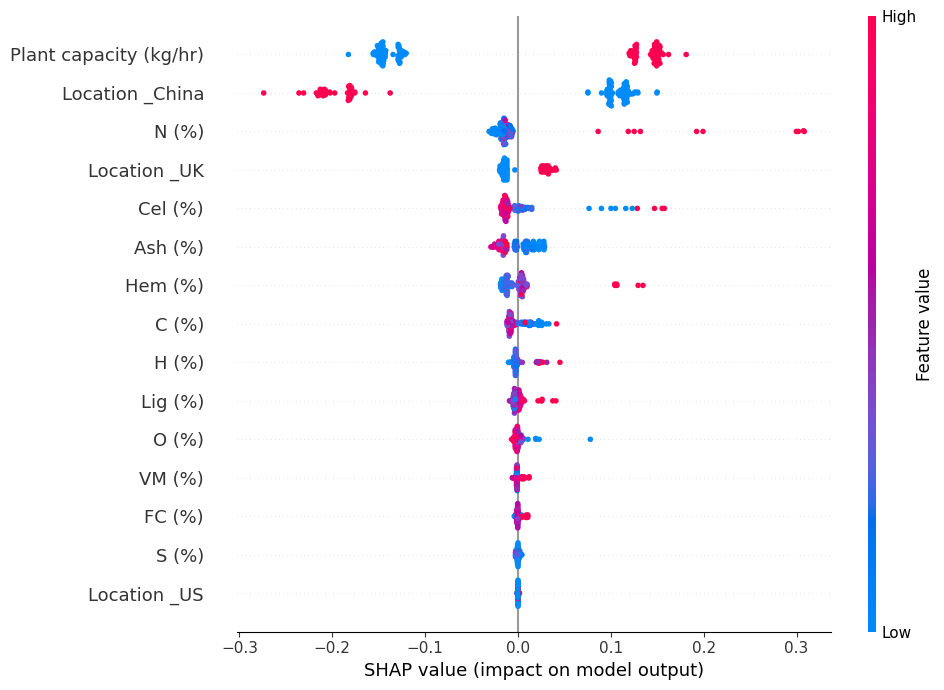

In [ ]:
# define model to use
model = GradientBoostingRegressor()
plot_shap(data,'MSP',model)

##### Local interpretabilty
Using SHAP for local interpretability can provide valuable insights into how a model is making predictions for specific instances, helping to build trust and understanding in machine learning models. The plot below shows how the prediction for the third data point in the dataset was done.

In the waterfall below, the x-axis has the values of the target (dependent) variable which is MSP. x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))).

The SHAP value for each feature in this observation is given by the length of the bar. In the example above, plant capacity has a SHAP value of -0.15, Location_China has a SHAP of +0.1 and so on. The sum of all SHAP values will be equal to E[f(x)] — f(x).

The absolute SHAP value shows us how much a single feature affected the prediction, so plant capacity contributed the most, Location_China and UK the second one,N and Ash  the third.

Note that these SHAP values are valid for this observation only. With other data points the SHAP values will change. In order to understand the importance or contribution of the features for the whole dataset, take a look at the global interpretability section

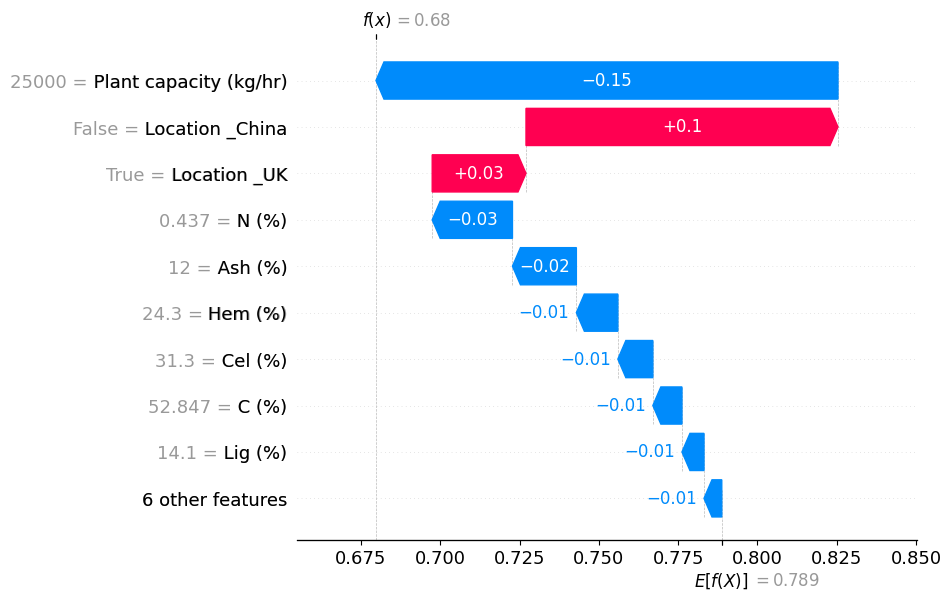

In [ ]:
plot_local_shap(data, 'MSP', model,3)